In [1]:
import pandas as pd

Pegar a base de dados

In [53]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Verificar se existem valores nulos na minha planilha. 

In [54]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Remover oos valores nulos da planilha

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Plotar o gráfico de relações entre as variáveis da minha planilha

In [57]:
import seaborn as sns

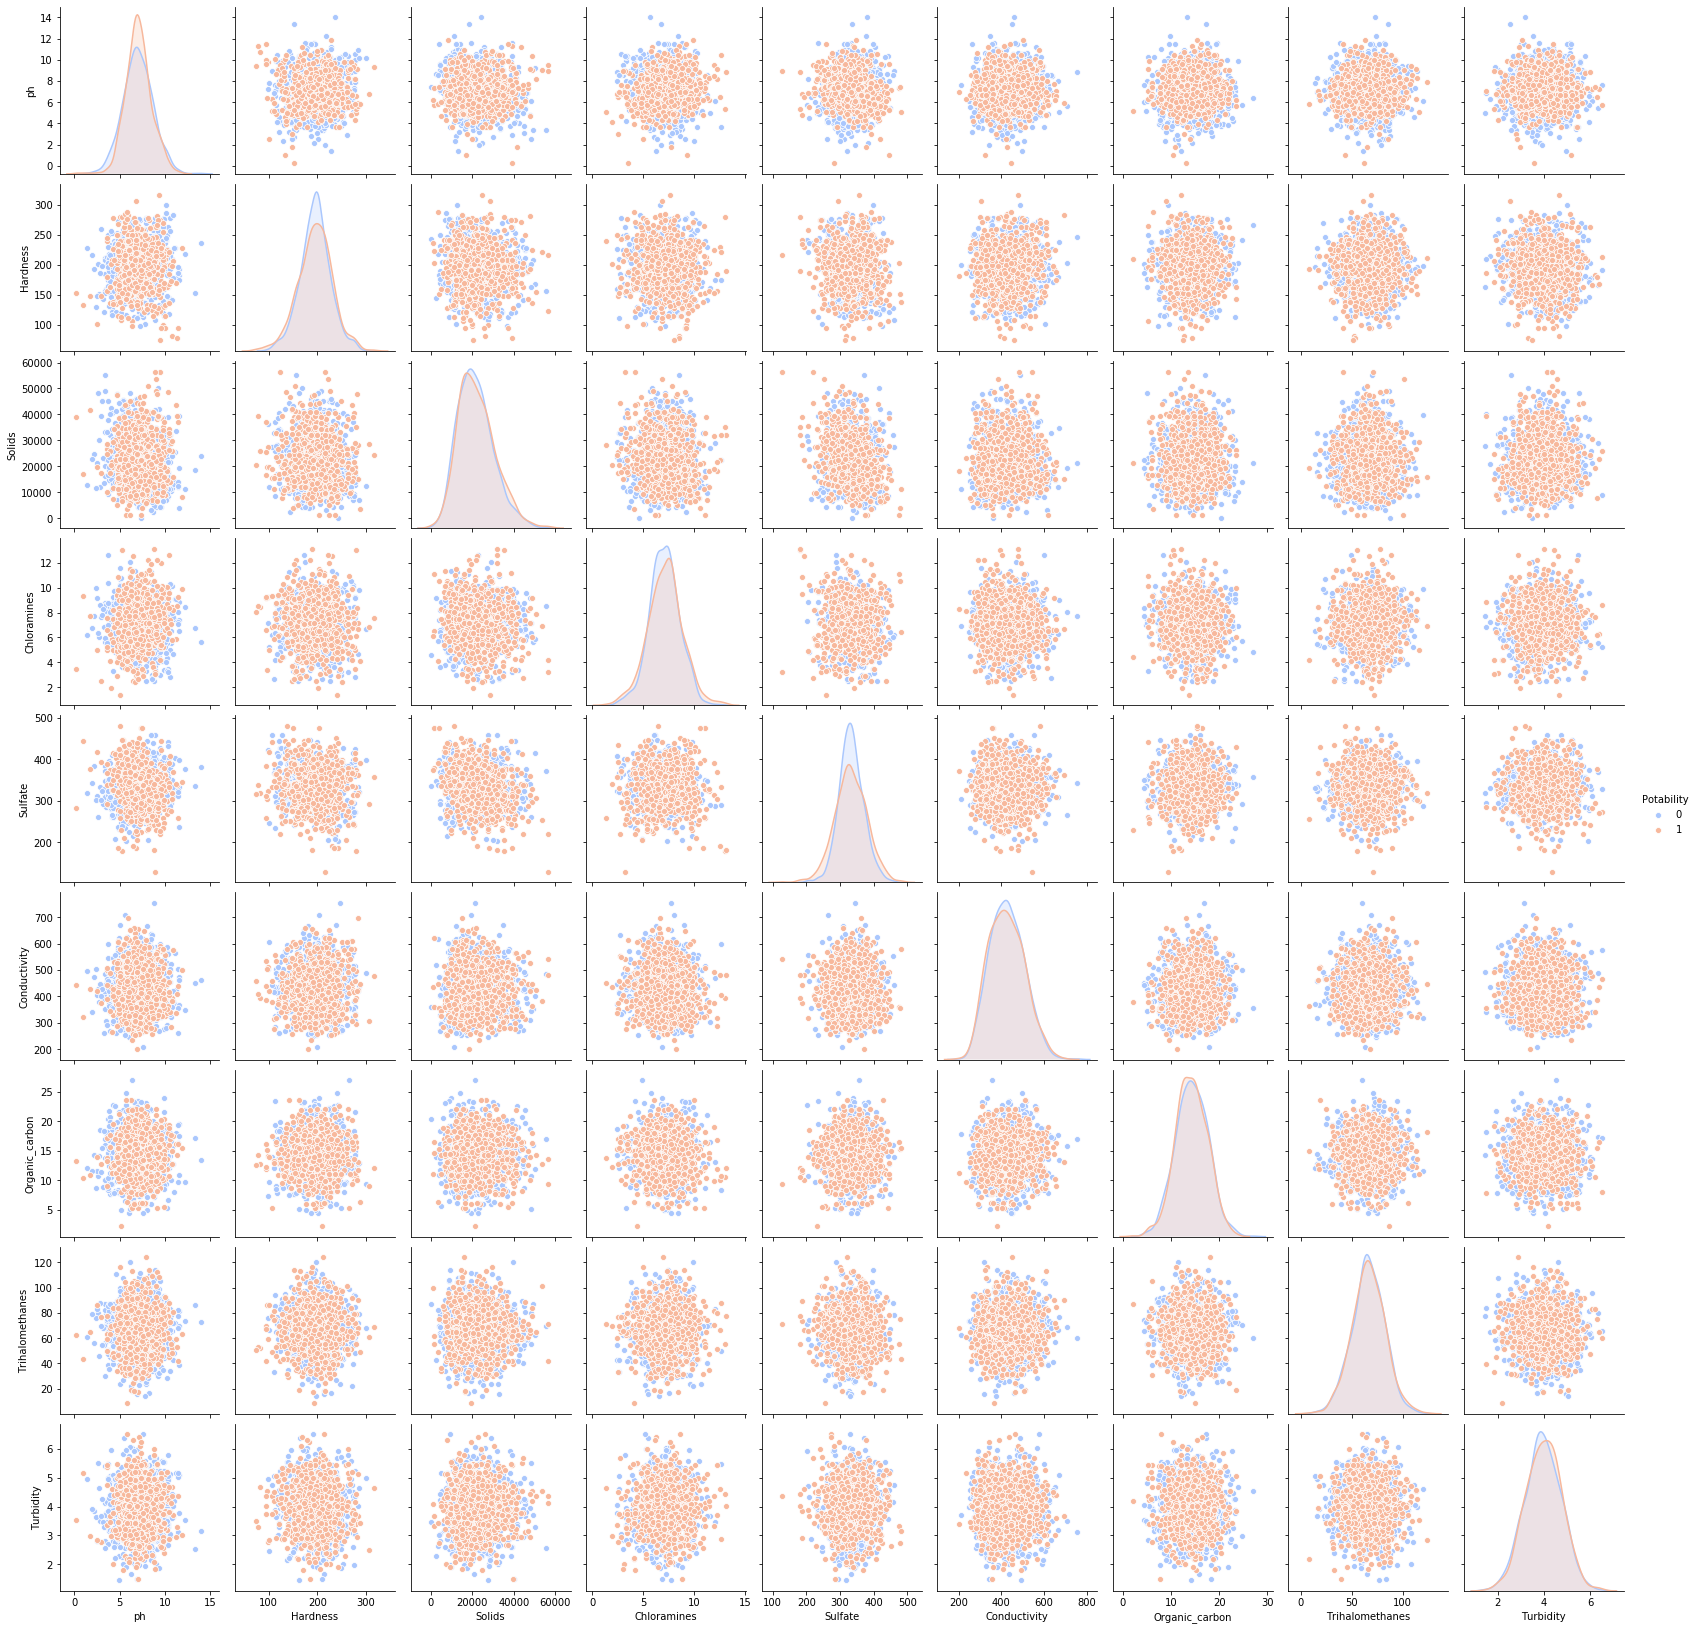

In [85]:
sns.pairplot(df, hue = 'Potability',palette='coolwarm')

Definição do objetivo: Criar um modelo preditivo que informa se a água é potável ou não

In [59]:
df.shape

(2011, 10)

Vamos separar a variável alvo e a variável base, X e Y respectivamente. A variável Y será o resultado que encontramos tomando como base os valores da variável X. Iremos separar a coluna Y do dataset e excluir a coluna potability da variável de base.

In [60]:
y = df['Potability']
x = df.drop('Potability', axis=1)

No próximo passo iremos criar um conjunto de dados para treino e um conjunto para testes. Dessa forma , iremos treinar o algoritmo até que ele entenda os padrões de uma água potável e não potável.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

# Esse test_size = 0.3 irá nos dar 30% dos dados para teste, enquanto os outros 70% servirão como treino.

Apenas no próximo passo irá ser realizado o processo de learning machine, no qual será utilizado o método da Árvore de classificação.

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
#Criação de modelo:
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino, y_treino)

#Imprimindo resultados
resultado = modelo.score(x_teste, y_teste)
print('Acurácia: ', resultado)

Acurácia:  0.6837748344370861


Por esse método, tivemos uma acurácia de aproximadamente 69%, o que é baixo para um modelo preditivo. Então o ideal é procurar um outro método que sirva para o nosso modelo. 

In [52]:
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv("water_potability.csv")
df = df.dropna()

In [70]:
scaler = StandardScaler()
scaler.fit(df.drop('Potability',axis=1))
scaled_features = scaler.transform(df.drop('Potability',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348


In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Potability'],
                                                    test_size=0.30)

Agora vamos usar o método KNN para verificar se é aplicado com maior efetividade na nossa base de dados.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [75]:
pred = knn.predict(X_test)

Vamos avaliar agora as predições e avaliações:

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,pred))

[[263 100]
 [131 110]]


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       363
           1       0.52      0.46      0.49       241

    accuracy                           0.62       604
   macro avg       0.60      0.59      0.59       604
weighted avg       0.61      0.62      0.61       604



In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

No entanto, nosso valor k pode melhorar, então vamos procurar por ele:

In [81]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

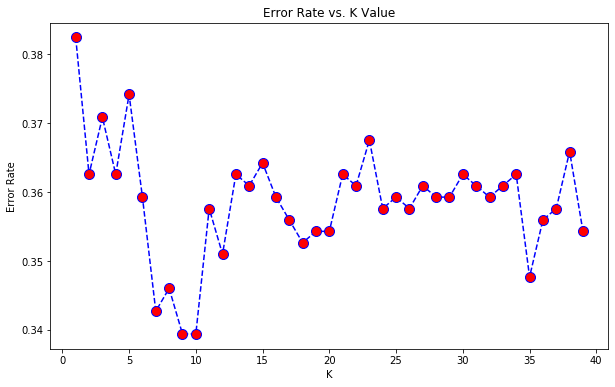

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Podemos ver que em um certo intervalo, o valor de k se mantem em uma faixa de erro entre 0,36. Então vamos treinar novamente nosso modelo.

In [84]:
# k = 25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[325  38]
 [179  62]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75       363
           1       0.62      0.26      0.36       241

    accuracy                           0.64       604
   macro avg       0.63      0.58      0.56       604
weighted avg       0.63      0.64      0.60       604



Comparando os valores de K = 1 e K = 25, podemos perceber que houve um acréscimo de 2%. No entanto, nosso modelo ainda apresenta uma porcentagem baixa de precisão ao predizer se a água é potável ou não.

Vamos tentar então por regrssão logística para ver se o problema está na distribuição dos dados ou se está nos modelos escolhidos.

In [86]:
df = pd.read_csv("water_potability.csv")
df = df.dropna()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [88]:
y = df['Potability']
x = df.drop('Potability', axis=1)

In [104]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state=0)

In [107]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_treino, y_treino)
y_pred = logistic_regression.predict(x_teste)

In [108]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show

Accuracy:  0.597682119205298


<function matplotlib.pyplot.show(*args, **kw)>

Dentre os 3 métodos utilizados, o que apresentou maior eficiência doi o de árvore de classificação. Isso provavelmente é devido aos dados fornecidos que são difíceis de separar.